In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from datetime import datetime
from datetime import timezone

# Data uploading

In [10]:
filename = "data/osn_departure_ESSA_tracks_TMA_2019_10_week1.csv"
tracks_df = pd.read_csv(filename, sep=' ',
    names = ['flight_id', 'sequence', 'destination', 'beginDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])

tracks_df.set_index(['flight_id', 'sequence'], inplace = True)

In [60]:
def plot_vertical_profile(flight_df):
    
    linewidth = 1
    #final_approach = 
    #df = flight_df[flight_df['altitude']>=final_approach]
    df = flight_df
    
    count = 0
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        count = count + 1
        flight_states_df = df.loc[(flight_id,), :]
        
        #flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)
            

In [15]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    linewidth = 1
    #final_approach = 
    #df = flight_df[flight_df['altitude']>=final_approach]
    df = flight_df
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [85]:
filename = "data/osn_departure_ESSA_states_TMA_filtered_2019_10_week1.csv"
states_filtered_df = pd.read_csv(filename, sep=' ',
    names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'],
    index_col=False,
    dtype={'sequence':int, 'timestamp':int, 'altitude':int, 'beginDate':int})

states_filtered_df.set_index(['flight_id', 'sequence'], inplace = True)
#print(states_filtered_df.head(1))
print(len(states_filtered_df.groupby(level='flight_id')))

2102


313


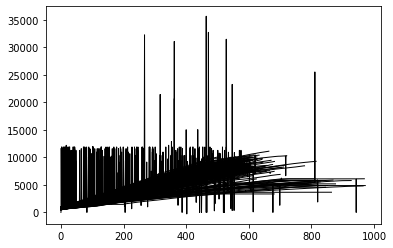

In [86]:
states_filtered_day_df = states_filtered_df[states_filtered_df['beginDate']==191001]
plot_vertical_profile(states_filtered_day_df)
print(len(states_filtered_day_df.groupby(level='flight_id')))

In [90]:
filename = "data/osn_departure_ESSA_states_TMA_smoothed_2019_10_week1.csv"
states_smoothed_df = pd.read_csv(filename, sep=' ',
    names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'],
    index_col=False,
    dtype={'sequence':int, 'timestamp':int, 'altitude':int, 'beginDate':int})

states_smoothed_df.set_index(['flight_id', 'sequence'], inplace = True)

313


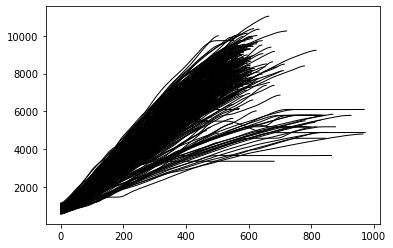

In [92]:
states_smoothed_day_df = states_smoothed_df[states_smoothed_df['beginDate']==191001]
plot_vertical_profile(states_smoothed_day_df)
print(len(states_smoothed_day_df.groupby(level='flight_id')))

In [76]:
filename = "data/osn_departure_ESSA_states_TMA_2019_10_week1.csv"
states_df = pd.read_csv(filename, sep=' ',
    names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'],
    index_col=False,
    dtype={'sequence':int, 'timestamp':int, 'altitude':int, 'beginDate':int})

states_df.set_index(['flight_id', 'sequence'], inplace = True)
#print(states_df.head(1))

13


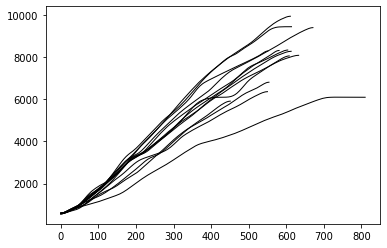

In [88]:
states_day_df = states_df[states_df['beginDate']==191001]
plot_vertical_profile(states_day_df)
print(len(states_day_df.groupby(level='flight_id')))

In [3]:
def make_TMA_plot():
    
    TMA_lon=[18.2130555555556, 18.5547222222222, 18.8469444444444, 19.3136111111111, 19.8280555555556, 19.2736111111111,
          18.9683333333333, 18.7547222222222, 18.5394444444444, 18.4572222222222, 17.9327777777778, 17.4569444444444,
          17.4077777777778, 17.2233333333333, 16.7077777777778, 16.2677777777778, 16.3183333333333, 16.4466666666667,
          17.5966666666667, 18.2130555555556];

    TMA_lat=[60.2994444444444, 60.2661111111111, 59.8827777777778, 60.0352777777778, 59.6736111111111, 59.5994444444444,
          59.255, 59.0419444444444, 58.8325, 58.7525, 58.5830555555556, 58.6163888888889, 58.9661111111111,
          58.9786111111111, 59.0119444444444, 59.0494444444444, 59.3238888888889, 59.7494444444444, 60.2327777777778,
          60.2994444444444];

    #number_of_rwys = 4

    rwy1_lon=[17.9361345, 17.9791531944444];
    rwy1_lat=[59.6584189166667, 59.6638971944444 ];

    rwy2_lon=[17.9132249722222, 17.9237679722222];
    rwy2_lat=[59.637256, 59.6664016944444 ];

    rwy3_lon=[17.9507426111111, 17.9587480555556];
    rwy3_lat=[59.6263963888889, 59.6484673055556];

    #rwy4_lon=[17.9296420277778, 17.9536581388889];
    #rwy4_lat=[59.3586702777778, 59.3500752777778];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy1_lon,rwy1_lat, color="red")
    plt.plot(rwy2_lon,rwy2_lat, color="red")
    plt.plot(rwy3_lon,rwy3_lat, color="red")
    #plt.plot(rwy4_lon,rwy4_lat, color="red")
    
    ELTOK_lon = 16.6503
    ELTOK_lat = 59.5861
    HMR_lon = 18.3917
    HMR_lat = 60.2794
    XILAN_lon = 19.0761
    XILAN_lat = 59.6594
    NILUG_lon = 17.8847
    NILUG_lat = 58.8158

    plt.plot(HMR_lon, HMR_lat, 'ro')
    plt.plot(NILUG_lon, NILUG_lat, 'ro')
    plt.plot(XILAN_lon, XILAN_lat, 'ro')
    plt.plot(ELTOK_lon, ELTOK_lat, 'ro')

In [4]:
 def plot_horizontal_profile(df):
        
    linewidth = 1
    
    plt.figure(figsize=(9,6))
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    make_TMA_plot()
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        plt.plot(lon, lat, color='k', linewidth=linewidth)

In [11]:
#print(tracks_df.head(1))
tracks_df_01 = tracks_df[tracks_df['beginDate']==191001]
#print(tracks_df_01.head(1))

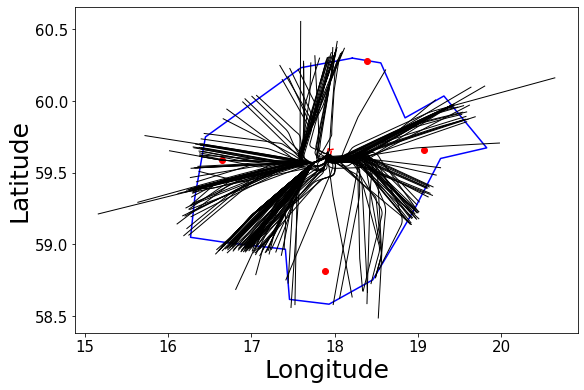

In [12]:
plot_horizontal_profile(tracks_df_01)